## Question 5: -
Write a program to download the data from the given API link and then extract the following data with
proper formatting


**Note** - Write comments wherever necessary explaining the code written.

**Link** - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

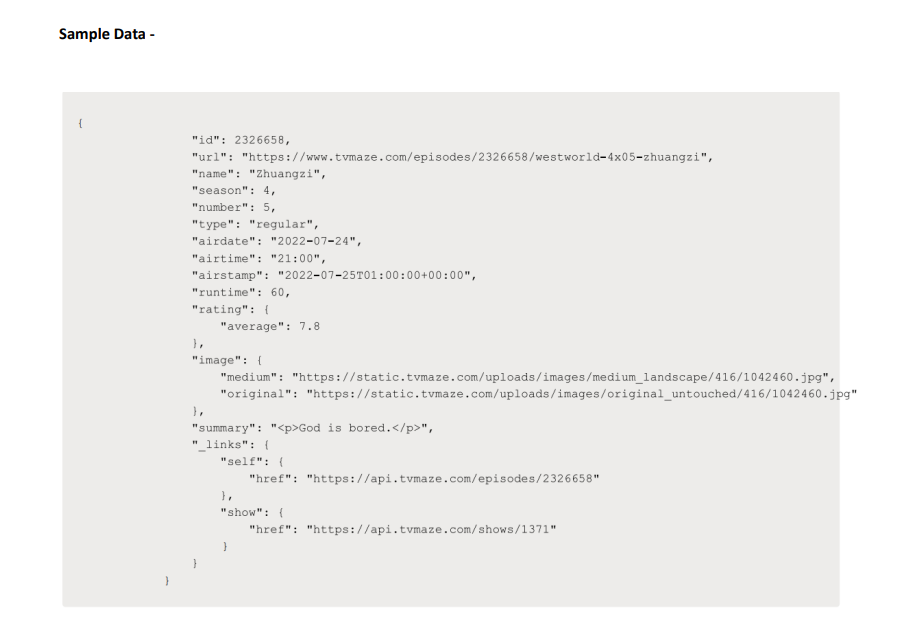


Data Attributes -
* id - int url - string
* name - string season
* number - int
* type - string airdate -
* date format airtime -
* 12-hour time format
* runtime - float
* average rating - float
* summary - string
* without html tags
* medium image link - string
* Original image link - string



In [1]:
import requests
import csv
import pandas as pd


In [2]:
# Function to download data from the given API link
def download_data(api_link):
    response = requests.get(api_link)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Function to extract the desired attributes from the data
def extract_data(json_data):
    show_data = json_data
    episode_data = show_data.get('_embedded', {}).get('episodes', [])

    extracted_data = []
    for episode in episode_data:
        extracted_data.append({
            'id': episode.get('id', ''),
            'url': episode.get('url', ''),
            'name': episode.get('name', ''),
            'season number': episode.get('season', ''),
            'episode number': episode.get('number', ''),
            'type': episode.get('type', ''),
            'airdate': episode.get('airdate', ''),
            'airtime': episode.get('airtime', ''),
            'runtime': episode.get('runtime', ''),
            'average rating': episode.get('rating', {}).get('average', ''),
            'summary': episode.get('summary', '').replace('<p>', '').replace('</p>', ''),
            'medium image link': episode.get('image', {}).get('medium', ''),
            'original image link': episode.get('image', {}).get('original', '')
        })
    return extracted_data

# Function to save the extracted data in a CSV file
def save_to_csv(data, output_file):
    fieldnames = data[0].keys()
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)



In [3]:
# Main program
def main():
    api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
    output_file = "westworld_episodes.csv"

    # Download data from the API link
    json_data = download_data(api_link)

    if json_data:
        # Extract the desired attributes from the data
        extracted_data = extract_data(json_data)

        # Save the extracted data in a CSV file
        save_to_csv(extracted_data, output_file)
        print("Data saved to", output_file)
    else:
        print("Failed to download data.")

# Run the program
if __name__ == "__main__":
    main()


Data saved to westworld_episodes.csv


In [4]:
df=pd.read_csv('westworld_episodes.csv')
df.head()

,id,url,name,season number,episode number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
